In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
anime_dataset = pd.read_csv("./anime-dataset-2023.csv")
user_dataset = pd.read_csv("./users-details-2023.csv")
score_dataset = pd.read_csv("./users-score-2023.csv")

In [3]:
anime_dataset.head(5)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


In [4]:
anime_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

In [5]:
anime_dataset.isna().sum()

anime_id        0
Name            0
English name    0
Other name      0
Score           0
Genres          0
Synopsis        0
Type            0
Episodes        0
Aired           0
Premiered       0
Status          0
Producers       0
Licensors       0
Studios         0
Source          0
Duration        0
Rating          0
Rank            0
Popularity      0
Favorites       0
Scored By       0
Members         0
Image URL       0
dtype: int64

In [6]:
anime_dataset.describe()

,anime_id,Popularity,Favorites,Members
count,24905.000000,24905.000000,24905.000000,2.490500e+04
mean,29776.709014,12265.388356,432.595222,3.710496e+04
std,17976.076290,7187.428393,4353.181647,1.568252e+05
min,1.000000,0.000000,0.000000,0.000000e+00
25%,10507.000000,6040.000000,0.000000,2.090000e+02
50%,34628.000000,12265.000000,1.000000,1.056000e+03
75%,45240.000000,18491.000000,18.000000,9.326000e+03
max,55735.000000,24723.000000,217606.000000,3.744541e+06


In [7]:
user_dataset.head(5)

,Mal ID,Username,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
0,1,Xinil,Male,1985-03-04T00:00:00+00:00,California,2004-11-05T00:00:00+00:00,142.3,7.37,1.0,233.0,8.0,93.0,64.0,399.0,60.0,8458.0
1,3,Aokaado,Male,NaN,"Oslo, Norway",2004-11-11T00:00:00+00:00,68.6,7.34,23.0,137.0,99.0,44.0,40.0,343.0,15.0,4072.0
2,4,Crystal,Female,NaN,"Melbourne, Australia",2004-11-13T00:00:00+00:00,212.8,6.68,16.0,636.0,303.0,0.0,45.0,1000.0,10.0,12781.0
3,9,Arcane,NaN,NaN,NaN,2004-12-05T00:00:00+00:00,30.0,7.71,5.0,54.0,4.0,3.0,0.0,66.0,0.0,1817.0
4,18,Mad,NaN,NaN,NaN,2005-01-03T00:00:00+00:00,52.0,6.27,1.0,114.0,10.0,5.0,23.0,153.0,42.0,3038.0


In [8]:
user_dataset.isna().sum()

Mal ID                   0
Username                 1
Gender              506907
Birthday            563222
Location            578485
Joined                   0
Days Watched             8
Mean Score               8
Watching                 8
Completed                8
On Hold                  8
Dropped                  8
Plan to Watch            8
Total Entries            8
Rewatched                8
Episodes Watched         8
dtype: int64

In [9]:
user_dataset.describe()

,Mal ID,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
count,7.312900e+05,731282.000000,731282.000000,731282.000000,731282.000000,731282.000000,731282.000000,731282.000000,731282.000000,731282.000000,7.312820e+05
mean,5.070203e+05,24.180819,3.948018,4.765714,65.953066,3.391615,4.565480,17.547893,96.230147,4.443352,1.658828e+03
std,3.640147e+05,140.105073,4.137606,20.495890,186.633286,19.296913,34.915341,90.286927,265.459220,29.693175,5.077168e+04
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2.011085e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,4.251705e+05,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.500000e+01
75%,7.753400e+05,24.800000,8.040000,4.000000,48.000000,1.000000,1.000000,5.000000,74.000000,0.000000,1.489000e+03
max,1.291097e+06,105338.600000,255.000000,4358.000000,13226.000000,5167.000000,14341.000000,21804.000000,24817.000000,13215.000000,3.376442e+07


In [10]:
score_dataset.head(5)

,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
2,1,Xinil,320,A Kite,5
3,1,Xinil,49,Aa! Megami-sama!,8
4,1,Xinil,304,Aa! Megami-sama! Movie,8


In [11]:
score_dataset.isna().sum()

user_id          0
Username       232
anime_id         0
Anime Title      0
rating           0
dtype: int64

In [12]:
# On observe quelques doublons:
anime_counts = anime_dataset["Name"].value_counts()

In [13]:
# Afficher tous les animés qui sont dans la dataset anime_data (en tenant compte des doublons)
len(anime_counts)

24901

In [14]:
# Afficher tous les doublons qui sont dans le dataset des animés
anime_dataset[anime_dataset["Name"].isin(anime_counts.index[anime_counts.gt(1)])].sort_values("Name")

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
24137,54618,Awakening,UNKNOWN,Awakening,UNKNOWN,UNKNOWN,No description available for this anime.,Music,1.0,"May 11, 2020",...,UNKNOWN,Mixed media,3 min,UNKNOWN,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1535/...
24840,55658,Awakening,UNKNOWN,Awakening,UNKNOWN,UNKNOWN,Music video for the song Awakening by Ken Ishii.,Music,1.0,"Oct 30, 2002",...,UNKNOWN,Original,4 min,G - All Ages,UNKNOWN,24580,0,UNKNOWN,35,https://cdn.myanimelist.net/images/anime/1632/...
14749,38328,Azur Lane,Azur Lane the Animation,アズールレーン THE ANIMATION,6.28,"Action, Sci-Fi","When the ""Sirens,"" an alien force with an arse...",TV,12.0,"Oct 3, 2019 to Mar 20, 2020",...,Bibury Animation Studios,Game,23 min per ep,R+ - Mild Nudity,7502.0,1343,960,58398.0,162902,https://cdn.myanimelist.net/images/anime/1106/...
24586,55351,Azur Lane,Azur Lane,アズールレーン,UNKNOWN,"Action, Slice of Life",Assorted commercials for the Azur Lane Mobile ...,Special,UNKNOWN,"Apr 17, 2020 to ?",...,UNKNOWN,Game,30 sec,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1421/...
3053,3473,Souseiki,The Genesis,創世記,5.38,UNKNOWN,This is a short film parodying the major Holly...,Movie,1.0,"Oct 1, 1968",...,UNKNOWN,Unknown,4 min,PG - Children,11141.0,10929,1,965.0,1831,https://cdn.myanimelist.net/images/anime/10/57...
24807,55610,Souseiki,UNKNOWN,UNKNOWN,UNKNOWN,Fantasy,As Shoko Asahara is depicted in a less embelli...,OVA,1.0,Not available,...,UNKNOWN,Original,Unknown,G - All Ages,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1704/...
8375,21103,Utopia,UNKNOWN,true tears×花咲くいろは×TARITARI ユートピア,6.41,UNKNOWN,Utopia is a song that was specially created fo...,Music,1.0,"Feb 26, 2014",...,P.A. Works,Original,1 min,PG-13 - Teens 13 or older,UNKNOWN,6874,4,2740.0,7252,https://cdn.myanimelist.net/images/anime/13/55...
24781,55582,Utopia,UNKNOWN,ユートピア,UNKNOWN,UNKNOWN,No description available for this anime.,Music,1.0,"Aug 12, 2021",...,UNKNOWN,Original,3 min,G - All Ages,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1475/...


In [15]:
# On choisit de supprimer les doublons qui donnent le moins d'informations
anime_ids_delete = [54618, 55351, 55610, 55582]

In [16]:
# Définir une fonction pour supprimer les doublons qui prend en entrée un dataframe et une liste de ID
def remove_duplicates(df, anime_ids_delete):
  return df[ ~ df["anime_id"].isin(anime_ids_delete) ]

In [17]:
anime_dataset = remove_duplicates(anime_dataset, anime_ids_delete)
score_dataset = remove_duplicates(score_dataset, anime_ids_delete)

In [18]:
anime_dataset.value_counts().sort_values()

anime_id  Name                                   English name            Other name                  Score    Genres                            Synopsis                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [19]:
# Combien d'animés ? 
# Combien d'utilisateurs?

In [20]:
nb_animes = len(anime_dataset)
print(f"Il y a {nb_animes} animés.")

Il y a 24901 animés.


In [21]:
nb_users = len(score_dataset["user_id"].unique())
print(f"Il y a {nb_users} utilisateurs.")

Il y a 270033 utilisateurs.


In [22]:
# Créer la matrice des notes (une ligne par utilisateur, une colonne par film). Quelle est la proportion de notes manquantes ?

In [23]:
# IndexError: index 159767137 is out of bounds for axis 0 with size 159767105
# r = score_dataset.pivot_table(index="user_id", columns="anime_id", values="rating")
# nb_nan = r.isna().sum().sum()
# ratio_nan = nb_nan/r.size
# print(f"{ratio_nan*100:.2f}% des valeurs sont manquantes.")

In [24]:
##### Etudier la variable notes (paramètres statistiques et représentations graphiques)

In [25]:
# La note moyenne
score_dataset["rating"].describe()

count    2.432491e+07
mean     7.622947e+00
std      1.661504e+00
min      1.000000e+00
25%      7.000000e+00
50%      8.000000e+00
75%      9.000000e+00
max      1.000000e+01
Name: rating, dtype: float64

<Figure size 1000x600 with 0 Axes>

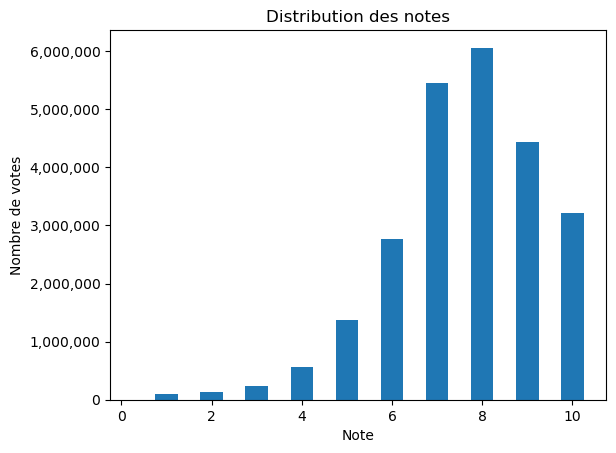

In [26]:
import matplotlib.ticker as mtick

# Histogramme des notes (avec un pas de 0.5) et format des ticks en entiers
plt.figure(figsize=(10,6))
ax = score_dataset.hist("rating", bins=np.arange(0.25, 10.5, 0.5), grid=False)

# Forcer l'affichage des fréquences sur l'axe Y avec des entiers
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('Distribution des notes')
plt.xlabel('Note')
plt.ylabel('Nombre de votes')
plt.show()

<Axes: ylabel='count'>

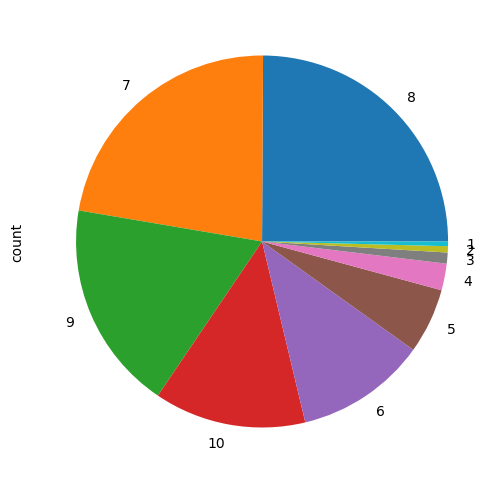

In [27]:
# Diagramme circulaire
plt.figure(figsize=(6,15))
score_dataset["rating"].value_counts().plot.pie()

In [28]:
# Définir une variable égale au nombre de notes reçues par chaque animé. 
# Etudier cette variable (paramètres statistiques et représentations graphiques).

In [29]:
dict_title_to_id = dict(zip( anime_dataset["Name"], anime_dataset["anime_id"] ))
dict_id_to_title = {v : k for k, v in dict_title_to_id.items()}

In [30]:
nb_ratings_per_anime = score_dataset.groupby(by="anime_id").size().sort_values(ascending=False)
nb_ratings_per_anime = nb_ratings_per_anime.rename("nb ratings")

In [31]:
nb_ratings_per_anime.index = nb_ratings_per_anime.index.map(lambda x: dict_id_to_title.get(x, f"Unknown anime_id {x}"))

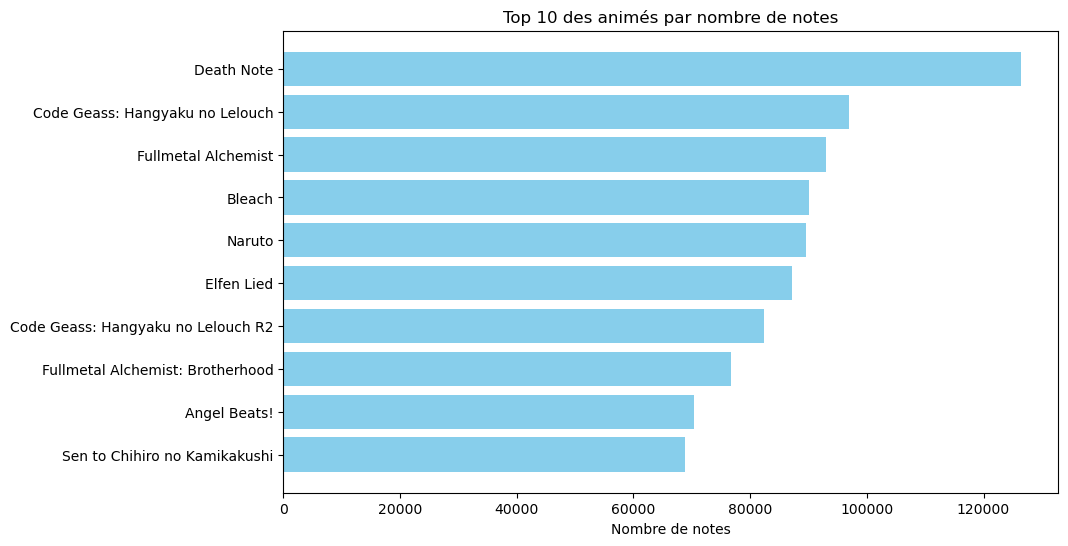

In [32]:
# Sélectionner les 10 premiers animés
top_10_anime = nb_ratings_per_anime.head(10)

# Créer un diagramme en barres
plt.figure(figsize=(10,6))
plt.barh(top_10_anime.index, top_10_anime.values, color='skyblue')
plt.xlabel('Nombre de notes')
plt.title('Top 10 des animés par nombre de notes')
plt.gca().invert_yaxis()  # Inverser l'axe des y pour avoir le 1er en haut
plt.show()

In [33]:
# # Définir une variable égale à la note moyenne de chaque animé. 
# Etudier cette variable (paramètres statistiques et représentations graphiques).

In [34]:
# Calculate the mean rating for each anime_id
average_ratings_per_anime = score_dataset.groupby(by="anime_id")["rating"].mean().sort_values(ascending=False)
average_ratings_per_anime = average_ratings_per_anime.rename("average ratings")
average_ratings_per_anime = average_ratings_per_anime[average_ratings_per_anime.index.isin(dict_id_to_title.keys())]
average_ratings_per_anime.index = average_ratings_per_anime.index.map(lambda x: dict_id_to_title[x])

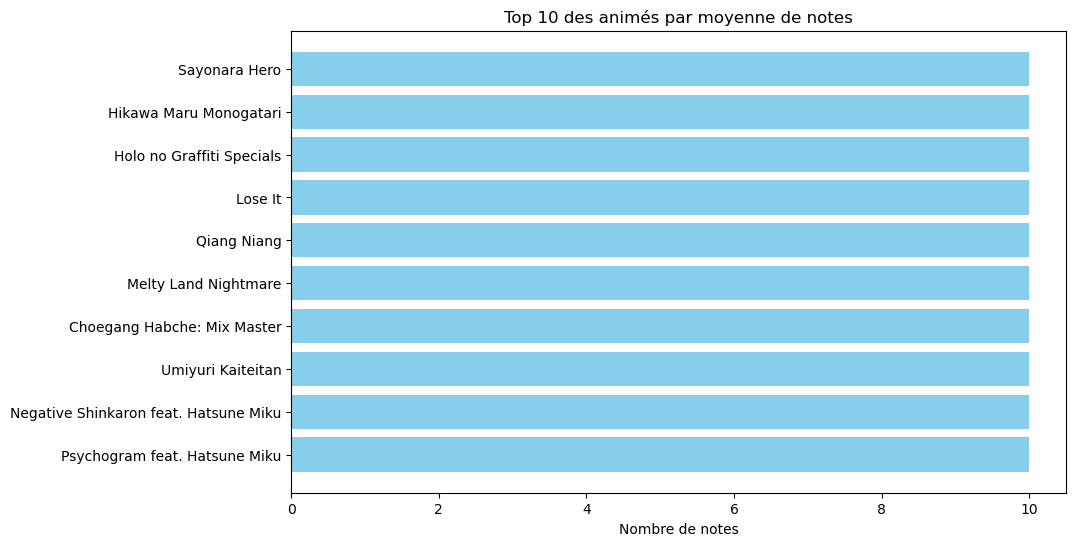

In [35]:
# Sélectionner les 10 premiers animés
top_10_anime = average_ratings_per_anime.head(10)

# Créer un diagramme en barres
plt.figure(figsize=(10,6))
plt.barh(top_10_anime.index, top_10_anime.values, color='skyblue')
plt.xlabel('Nombre de notes')
plt.title('Top 10 des animés par moyenne de notes')
plt.gca().invert_yaxis()  # Inverser l'axe des y pour avoir le 1er en haut
plt.show()

In [36]:
# Pas pertinent, il peut y avoir un seul utilisateur qui a attribué une note 10/10

In [37]:
# Nombre d'animés par genre
list_genres = anime_dataset["Genres"].str.split(", ").explode().unique()

In [38]:
count_genres = pd.get_dummies(anime_dataset["Genres"].str.split(", ").explode()).sum().sort_values(ascending=False)
count_genres = count_genres.rename("count")

In [39]:
count_genres

Comedy           7142
Fantasy          5305
UNKNOWN          4927
Action           4729
Adventure        3842
Sci-Fi           3091
Drama            2836
Romance          2063
Slice of Life    1754
Supernatural     1494
Hentai           1486
Mystery           847
Avant Garde       804
Ecchi             795
Sports            771
Horror            534
Suspense          242
Award Winning     241
Boys Love         169
Gourmet           146
Girls Love        113
Erotica            54
Name: count, dtype: int64

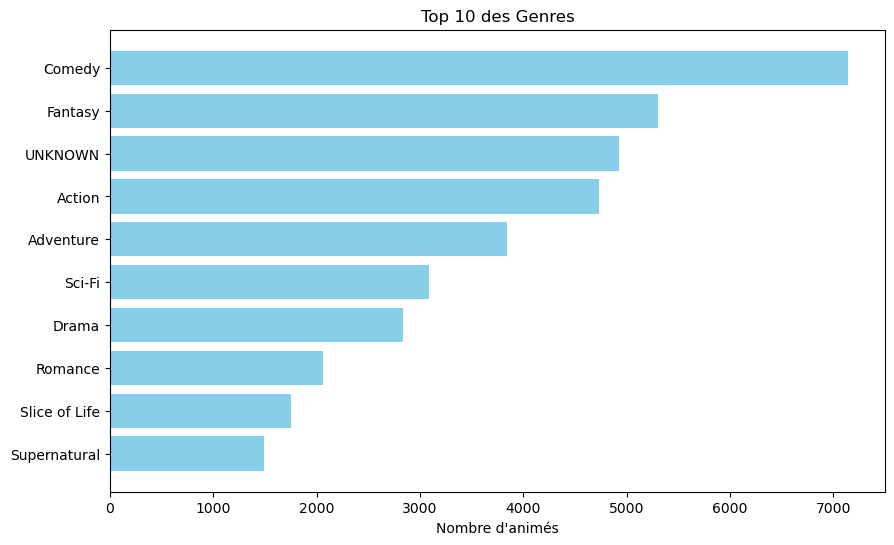

In [40]:
# Sélectionner les 10 premiers animés
top_10_anime = count_genres.head(10)

# Créer un diagramme en barres
plt.figure(figsize=(10,6))
plt.barh(top_10_anime.index, top_10_anime.values, color='skyblue')
plt.xlabel('Nombre d\'animés')
plt.title('Top 10 des Genres')
plt.gca().invert_yaxis()  # Inverser l'axe des y pour avoir le 1er en haut
plt.show()

In [41]:
# Note moyenne de chaque genre

In [42]:
df_mean_rating_genres = pd.get_dummies(anime_dataset["Genres"].str.split(", ").explode())
df_mean_rating_genres.index.name = "index"

In [43]:
df_mean_rating_genres

,Action,Adventure,Avant Garde,Award Winning,Boys Love,Comedy,Drama,Ecchi,Erotica,Fantasy,...,Hentai,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense,UNKNOWN
index,,,,,,,,,,,,,,,,,,,,,
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24902,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24902,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
24902,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [44]:
# One hot encoding des genres de chaque animé
df_mean_rating_genres = df_mean_rating_genres.groupby("index").sum()

In [45]:
df_mean_rating_genres

,Action,Adventure,Avant Garde,Award Winning,Boys Love,Comedy,Drama,Ecchi,Erotica,Fantasy,...,Hentai,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense,UNKNOWN
index,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24900,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
24901,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
24902,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [46]:
df_mean_rating_genres["anime_id"] = anime_dataset["anime_id"]

In [47]:
df_mean_rating_genres

,Action,Adventure,Avant Garde,Award Winning,Boys Love,Comedy,Drama,Ecchi,Erotica,Fantasy,...,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense,UNKNOWN,anime_id
index,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,5
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,6
3,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,7
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24900,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,55731
24901,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,55732
24902,1,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,55733


In [48]:
# On réindexe selon le movieId
df_mean_rating_genres = df_mean_rating_genres.set_index("anime_id")

In [49]:
# On ne garde que les anime_id communs aux deux datasets
common_anime_ids = df_mean_rating_genres.index.intersection(score_dataset["anime_id"])

# Filtrer df_mean_rating_genres selon ces anime_id
df_mean_rating_genres = df_mean_rating_genres.loc[common_anime_ids]

In [50]:
# On ajoute la colonne des notes pour chaque film
df_mean_rating_genres["rating"] = score_dataset["rating"]

In [51]:
df_mean_rating_genres

,Action,Adventure,Avant Garde,Award Winning,Boys Love,Comedy,Drama,Ecchi,Erotica,Fantasy,...,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense,UNKNOWN,rating
anime_id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,7.0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,8.0
6,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,7.0
7,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,5.0
8,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
55688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,7.0
55720,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.0


In [56]:
genre_ratings = {g : df_mean_rating_genres[df_mean_rating_genres[g] == 1]["rating"].mean() for g in list_genres}
genre_ratings

{'Action': 7.312439024390244,
 'Award Winning': 7.259090909090909,
 'Sci-Fi': 7.318235525797558,
 'Adventure': 7.3658362989323845,
 'Drama': 7.336411609498681,
 'Mystery': 7.294573643410852,
 'Supernatural': 7.389230769230769,
 'Fantasy': 7.3349725195256,
 'Sports': 7.239932885906041,
 'Comedy': 7.293470149253731,
 'Romance': 7.347177848775293,
 'Slice of Life': 7.3296875,
 'Suspense': 7.381909547738694,
 'Ecchi': 7.265888456549935,
 'Gourmet': 7.278260869565218,
 'Avant Garde': 7.3785425101214575,
 'Horror': 7.199134199134199,
 'Girls Love': 7.179245283018868,
 'Boys Love': 7.588235294117647,
 'Hentai': 7.529692832764505,
 'UNKNOWN': 7.381985892566468,
 'Erotica': 7.813953488372093}

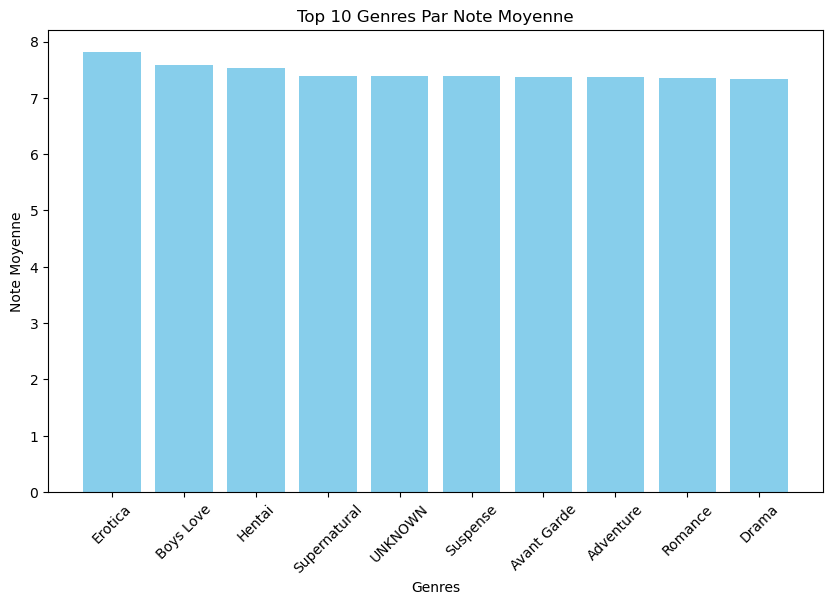

In [55]:
# Trier les genres par la note moyenne
sorted_genres = dict(sorted(genre_ratings.items(), key=lambda item: item[1], reverse=True))

# Sélectionner les 10 premiers genres
top_10_genres = dict(list(sorted_genres.items())[:10])

# Tracer l'histogramme
plt.figure(figsize=(10,6))
plt.bar(top_10_genres.keys(), top_10_genres.values(), color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Note Moyenne')
plt.title('Top 10 Genres Par Note Moyenne')
plt.xticks(rotation=45)
plt.show()